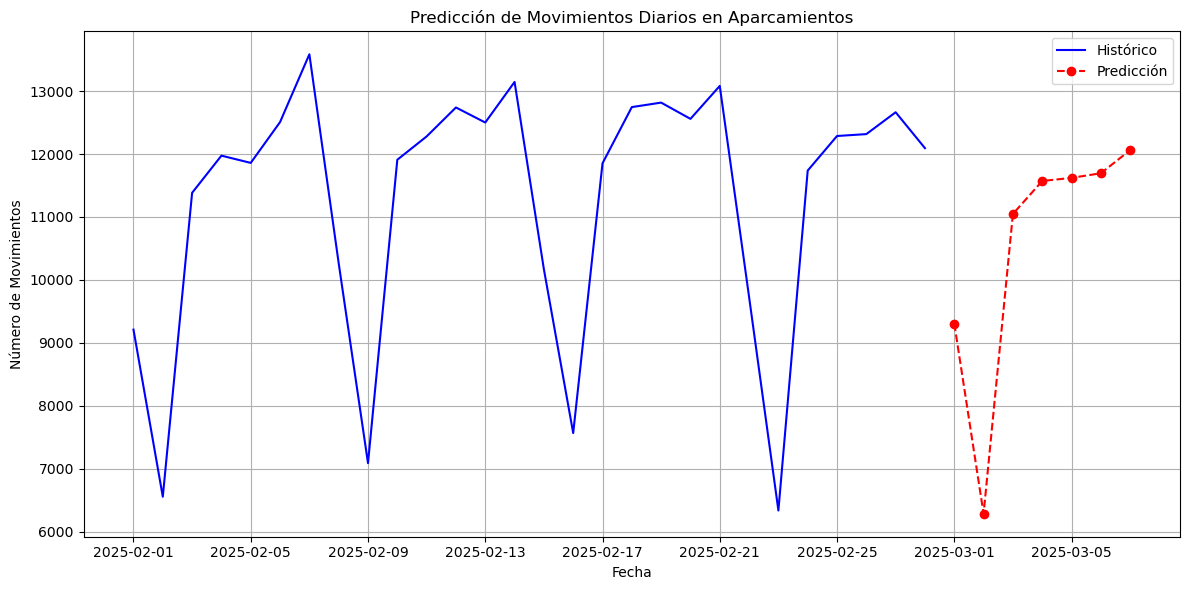

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar el archivo Excel
df = pd.read_excel("APARCAMIENTOS-FEBRERO-2025.xlsx")

# Convertir la columna 'Time' a datetime y establecerla como índice
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)  # Especifica dayfirst=True
df.set_index('Time', inplace=True)

# Agrupar por día y contar el número de movimientos
df_diario = df.resample('D').size()

# Asegurarse de que la frecuencia sea diaria y rellenar los días faltantes con 0
df_diario = df_diario.asfreq('D', fill_value=0)

# Modelo Holt-Winters
modelo = ExponentialSmoothing(
    df_diario,
    trend='add',
    seasonal='add',
    seasonal_periods=7,
    initialization_method='estimated'
).fit()

# Predecir los próximos 7 días
predicciones = modelo.forecast(7)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_diario.index, df_diario, label='Histórico', color='blue')
plt.plot(predicciones.index, predicciones, label='Predicción', color='red', linestyle='dashed', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Número de Movimientos')
plt.title('Predicción de Movimientos Diarios en Aparcamientos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
